# K-近邻算法
- 定义:如果一个样本在特征空间中的**k个最相似(即特征空间中最邻近)的样本中的大多数属于某一个类别**，则该样本也属于这个类别（**就是通过你的"邻居"来判断你属于哪个类别**）。
- 如何计算你到你的"邻居"的距离：一般时候,都是使用欧氏距离

# KNN算法流程总结

1. 计算已知类别数据集中的点与当前点之间的距离
2. 按距离递增次序排序
3. 选取与当前点距离最小的k个点
4. 统计前k个点所在的类别出现的频率
5. 返回前k个点出现频率最高的类别作为当前点的预测分类

# API
## sklearn.neighbors.KNeighborsClassifier()

```python
sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None, **kwargs)
```

`sklearn.neighbors.KNeighborsClassifier()`函数<font color=blue>是k近邻分类器的实现。</font>

- 参数说明：

    - `n_neighbors` : int型参数，可选参数，默认为5，表示要查询的邻居数。
    - `weights` : str或者callable型参数，可选参数，默认为'uniform'，表示预测时采用的权重函数。可选值为'uniform'和'distance'，或者自定义的可调用函数。当为uniform时，表示所有邻居的权重都相同；当为distance时，表示权重由距离的倒数决定；当为自定义的可调用函数时，函数会传入一组距离的数组，并返回一组具有相同形状的权重。
    - `algorithm` : {'auto', 'ball_tree', 'kd_tree', 'brute'}, 可选参数，默认为'auto'，表示用于计算最近邻的算法。可选值为'auto'，'ball_tree'，'kd_tree'和'brute'。
    - `leaf_size` : int型参数，可选参数，默认为30，表示用于kd_tree或ball_tree的叶子大小。
    - `p` : int型参数，可选参数，默认为2，表示用于Minkowski度量的参数。当p=1时，表示曼哈顿距离；当p=2时，表示欧氏距离；当p>2时，表示闵可夫斯基距离。
    - `metric` : 字符串型参数或可调用参数，可选参数，默认为'minkowski'，表示用于距离度量的距离度量。默认情况下使用闵可夫斯基距离。使用距离矩阵（例如，来自度量学习）时，此参数非常有用。
    - `metric_params` : dict型参数，可选参数，默认为None，表示度量函数的其他关键字参数。
    - `n_jobs` : int型参数，可选参数，默认为None，表示并行运行的作业数。如果为-1，则使用所有可用的CPU。
    - `**kwargs` : 可选参数，用于传递其他关键字参数到基础分类器。

- 返回值：

    返回一个KNeighborsClassifier对象，可以用于拟合和预测数据。
    
- 参考链接：

    官方文档：[sklearn.neighbors.KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [1]:
from sklearn.neighbors import KNeighborsClassifier
X = [[0], [1], [2], [3]]
y = [0, 0, 1, 1]
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y)
print(neigh.predict([[1.1]]))

[0]


# 步骤分析
1. 获取数据集
2. 数据基本处理
3. 特征工程
4. 机器学习
5. 模型评估

# 距离公式
## 距离公式的基本性质
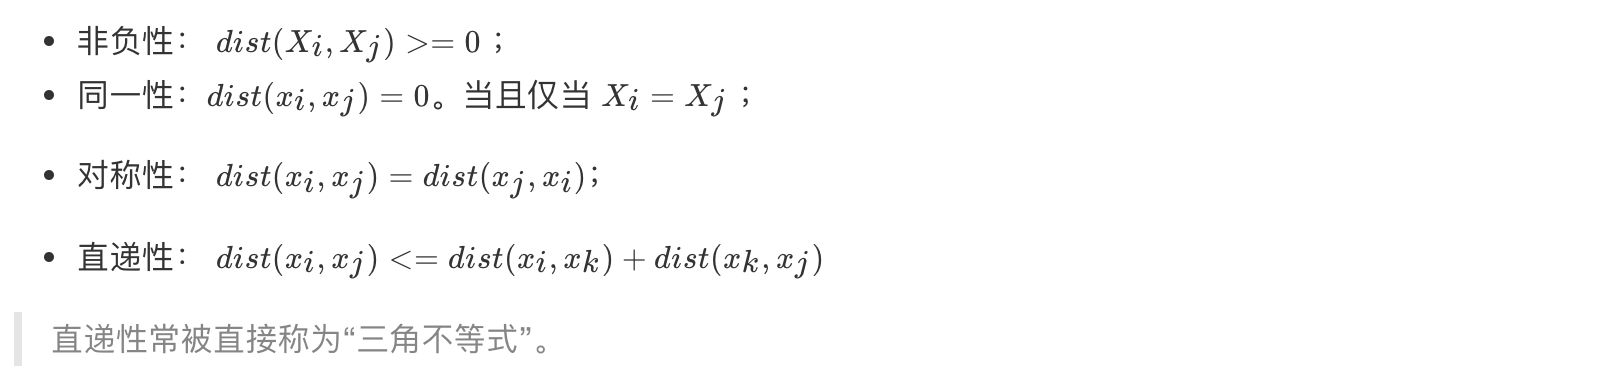
## 常见的距离公式
### 欧式距离
- 通过距离平方值进行计算
    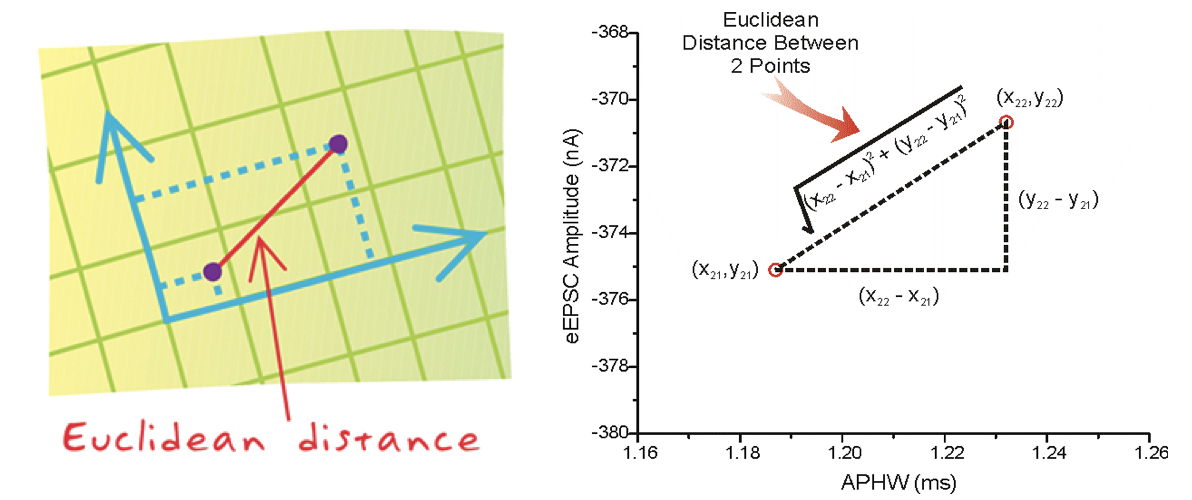
    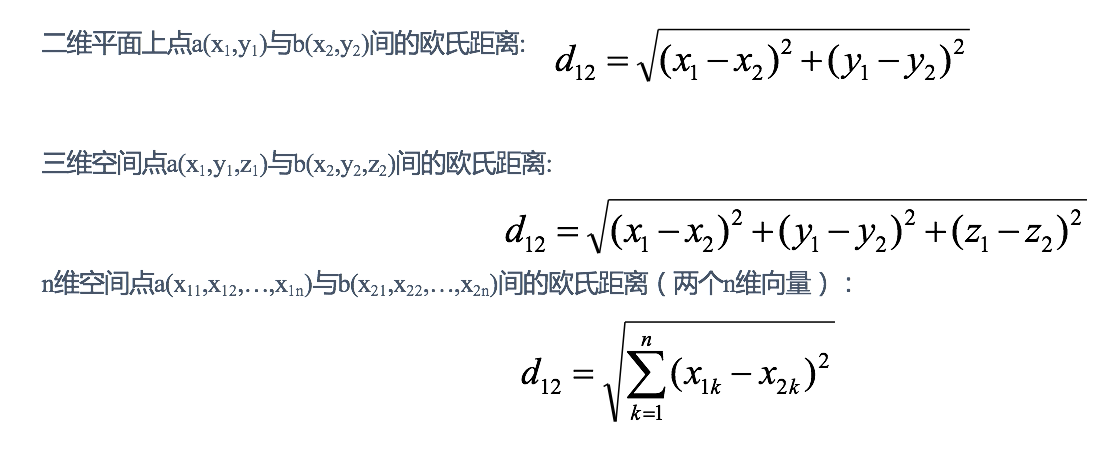
### 曼哈顿距离
- 通过距离的绝对值进行计算
    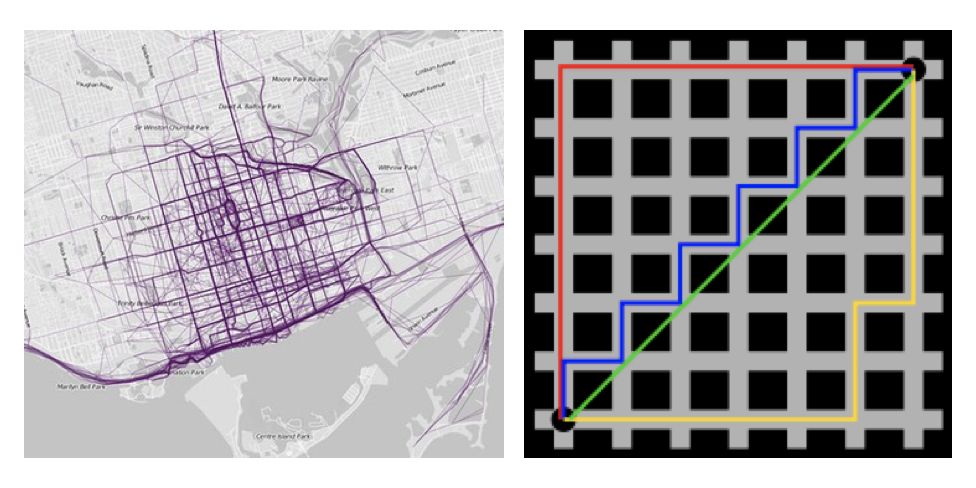
    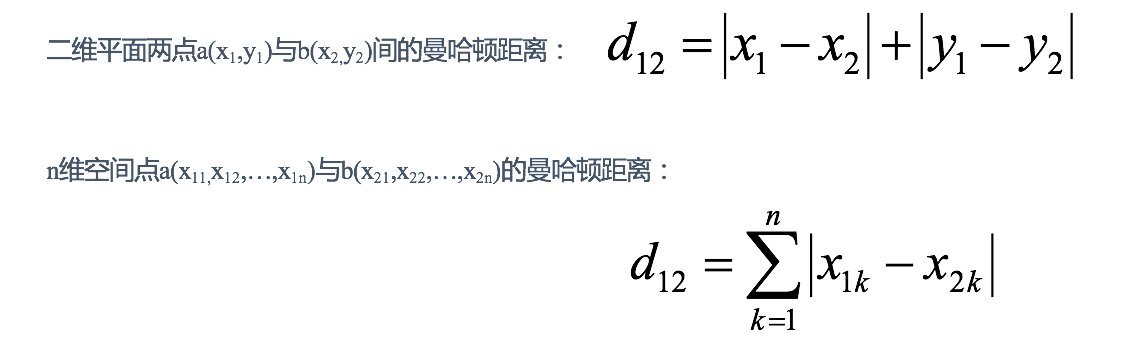
### 切比雪夫距离
- 维度的最大值进行计算
    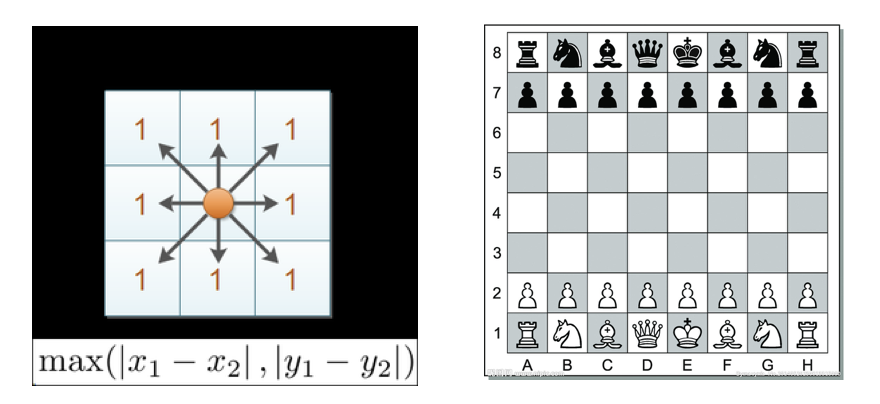
    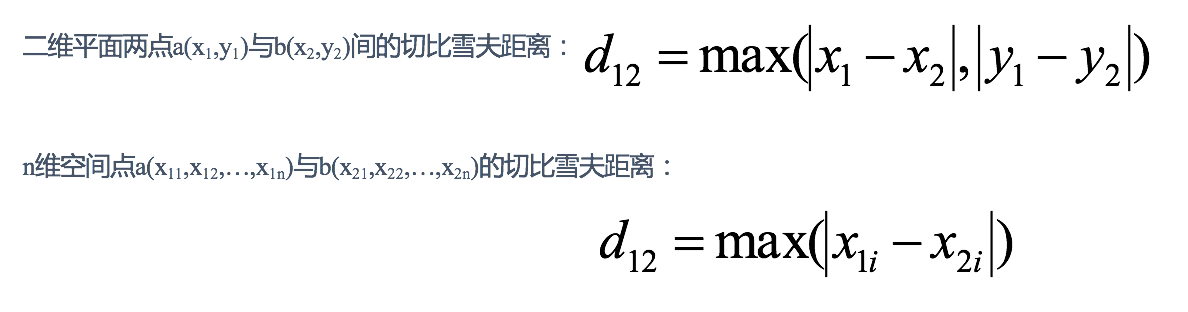
### 闵可夫斯基距离
- 当p=1时，就是曼哈顿距离；
- 当p=2时，就是欧氏距离；
- 当p→∞时，就是切比雪夫距离。
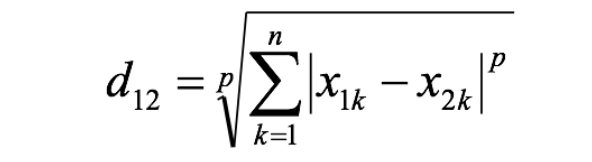

# K值大小
- K值过小：
    - 容易受到异常点的影响
    - 容易过拟合
- k值过大：
    - 受到样本均衡的问题
    - 容易欠拟合
# 近似误差和估计误差
- 近似误差
    - 对现有训练集的训练误差，关注训练集
- 估计误差
    - 可以理解为对测试集的测试误差，关注测试集

# kd树
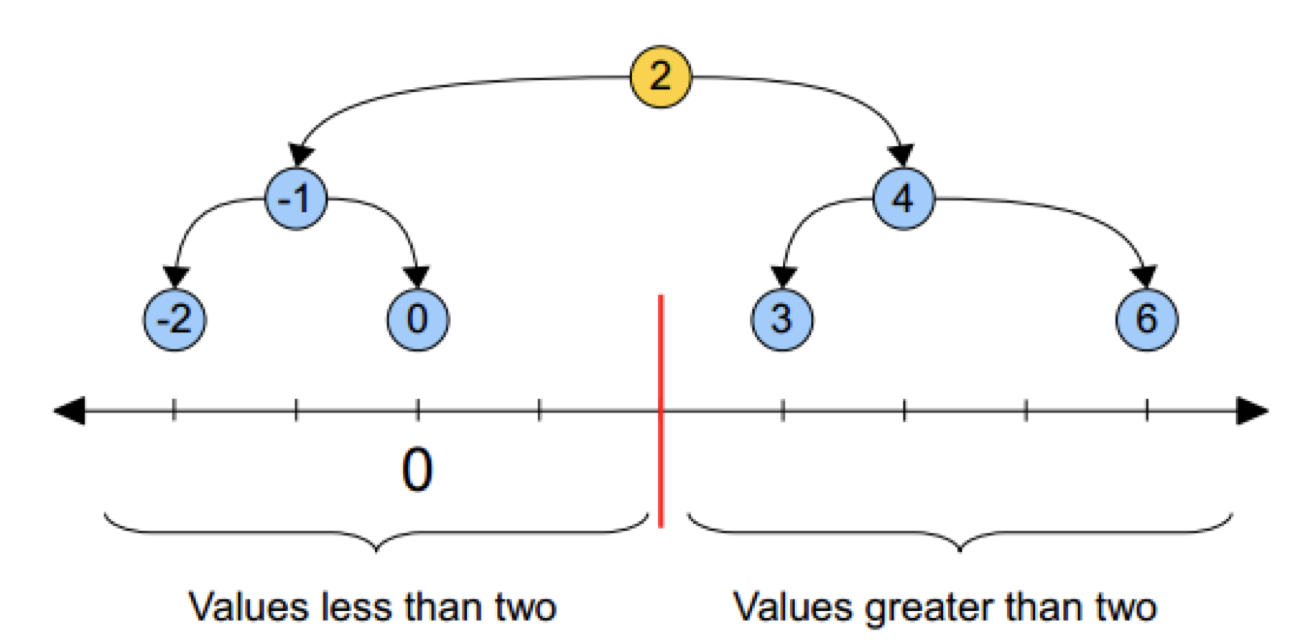
## kd树的构建过程
1. 构造根节点
2. 通过递归的方法，不断地对k维空间进行切分，生成子节点
3. 重复第二步骤，直到子区域中没有实例时终止
- 需要关注细节：   
    - 选择向量的哪一维进行划分；
    - 如何划分数据
    
## kd树的搜索过程
1. 二叉树搜索比较待查询节点和分裂节点的分裂维的值，（小于等于就进入左子树分支，大于就进入右子树分支直到叶子结点）
2. 顺着“搜索路径”找到最近邻的近似点
3. 回溯搜索路径，并判断搜索路径上的结点的其他子结点空间中是否可能有距离查询点更近的数据点，如果有可能，则需要跳到其他子结点空间中去搜索
4. 重复这个过程直到搜索路径为空

## 案例
### 树的建立
给定一个二维空间数据集：T={(2,3),(5,4),(9,6),(4,7),(8,1),(7,2)}，构造一个平衡kd树。
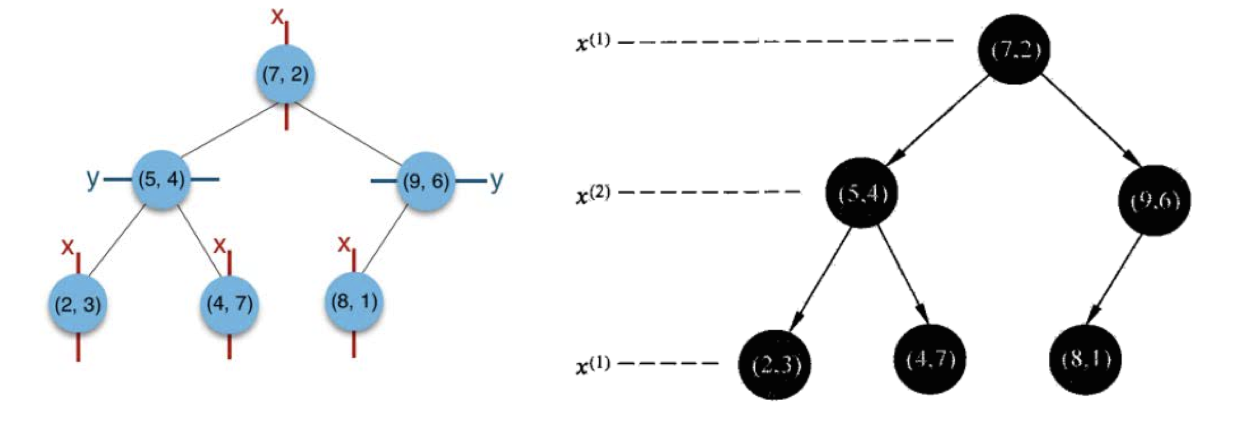
思路引导：

根结点对应包含数据集T的矩形，选择x(1)轴，6个数据点的x(1)坐标中位数是6，这里选最接近的(7,2)点，以平面x(1)=7将空间分为左、右两个子矩形（子结点）；接着左矩形以x(2)=4分为两个子矩形（左矩形中{(2,3),(5,4),(4,7)}点的x(2)坐标中位数正好为4），右矩形以x(2)=6分为两个子矩形，如此递归，最后得到如下图所示的特征空间划分和kd树。
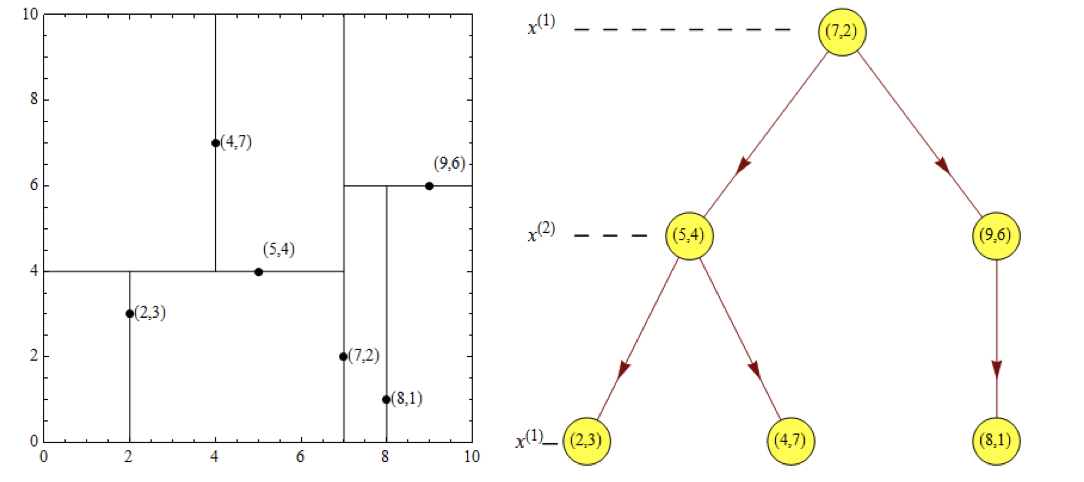

### 最近领域的搜索
假设标记为星星的点是 test point， 绿色的点是找到的近似点，在回溯过程中，需要用到一个队列，存储需要回溯的点，在判断其他子节点空间中是否有可能有距离查询点更近的数据点时，做法是以查询点为圆心，以当前的最近距离为半径画圆，这个圆称为候选超球（candidate hypersphere），如果圆与回溯点的轴相交，则需要将轴另一边的节点都放到回溯队列里面来。
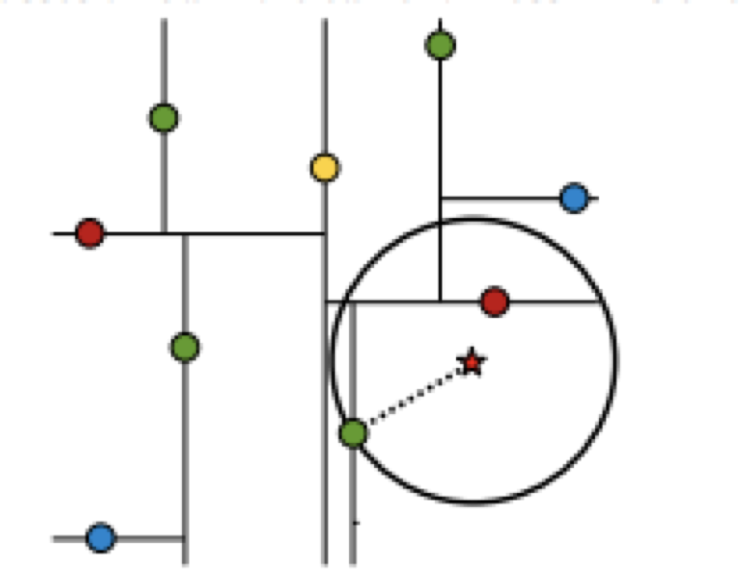
样本集{(2,3),(5,4), (9,6), (4,7), (8,1), (7,2)}

#### 查找点(2.1,3.1)
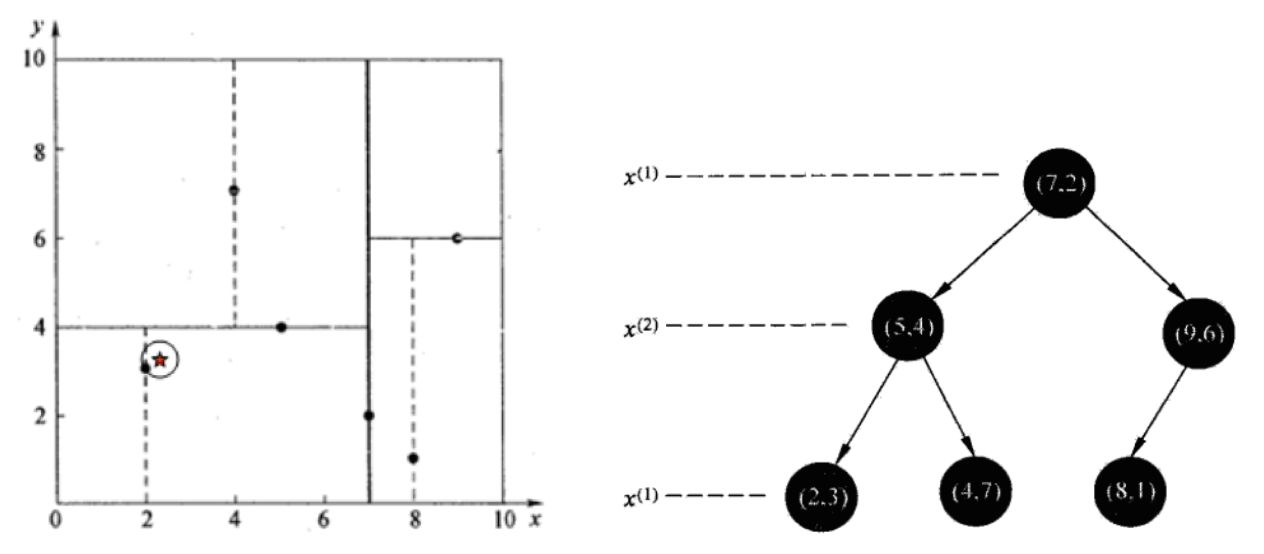
在(7,2)点测试到达(5,4)，在(5,4)点测试到达(2,3)，然后search_path中的结点为<(7,2),(5,4), (2,3)>，从search_path中取出(2,3)作为当前最佳结点nearest, dist为0.141；

然后回溯至(5,4)，以(2.1,3.1)为圆心，以dist=0.141为半径画一个圆，并不和超平面y=4相交，如上图，所以不必跳到结点(5,4)的右子空间去搜索，因为右子空间中不可能有更近样本点了。

于是再回溯至(7,2)，同理，以(2.1,3.1)为圆心，以dist=0.141为半径画一个圆并不和超平面x=7相交，所以也不用跳到结点(7,2)的右子空间去搜索。

至此，search_path为空，结束整个搜索，返回nearest(2,3)作为(2.1,3.1)的最近邻点，最近距离为0.141。

#### 查找点(2,4.5)
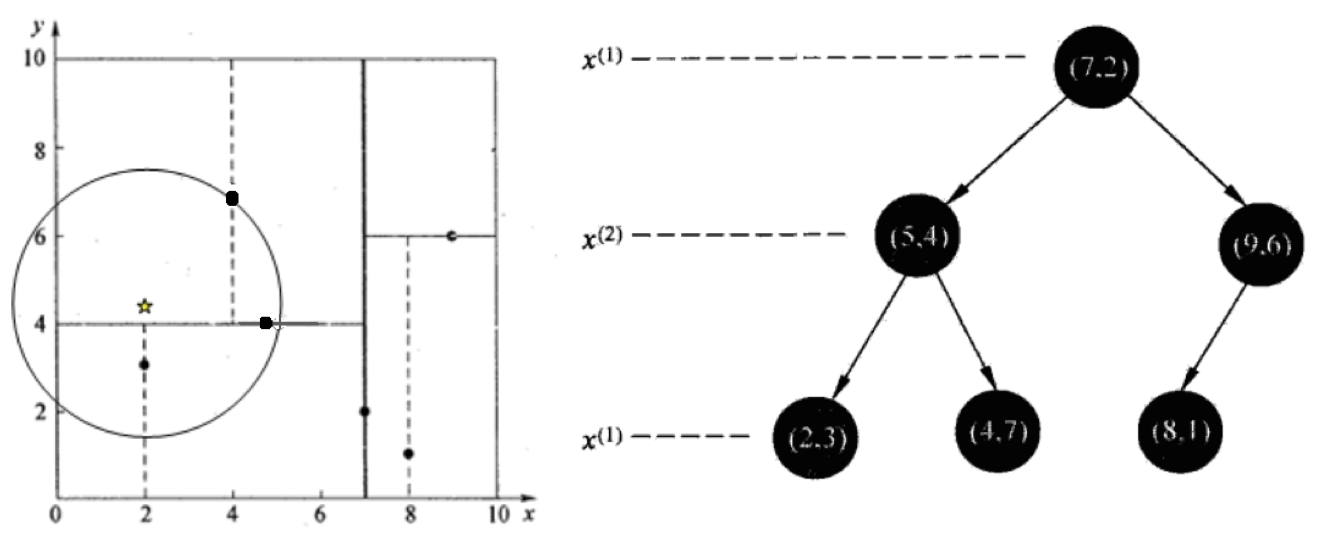
在(7,2)处测试到达(5,4)，在(5,4)处测试到达(4,7)【优先选择在本域搜索】，然后search_path中的结点为<(7,2),(5,4), (4,7)>，从search_path中取出(4,7)作为当前最佳结点nearest, dist为3.202；

然后回溯至(5,4)，以(2,4.5)为圆心，以dist=3.202为半径画一个圆与超平面y=4相交，所以需要跳到(5,4)的左子空间去搜索。所以要将(2,3)加入到search_path中，现在search_path中的结点为<(7,2),(2, 3)>；另外，(5,4)与(2,4.5)的距离为3.04 < dist = 3.202，所以将(5,4)赋给nearest，并且dist=3.04。

回溯至(2,3)，(2,3)是叶子节点，直接平判断(2,3)是否离(2,4.5)更近，计算得到距离为1.5，所以nearest更新为(2,3)，dist更新为(1.5)

回溯至(7,2)，同理，以(2,4.5)为圆心，以dist=1.5为半径画一个圆并不和超平面x=7相交, 所以不用跳到结点(7,2)的右子空间去搜索。

至此，search_path为空，结束整个搜索，返回nearest(2,3)作为(2,4.5)的最近邻点，最近距离为1.5。

# 特征工程

- 定义
    - 通过一些转换函数将特征数据转换成更加适合算法模型的特征数据过程
- 包含内容:
    - 归一化
    - 标准化
## 归一化
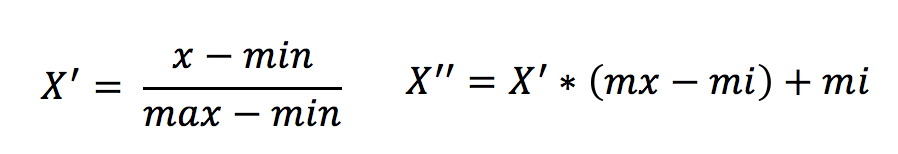
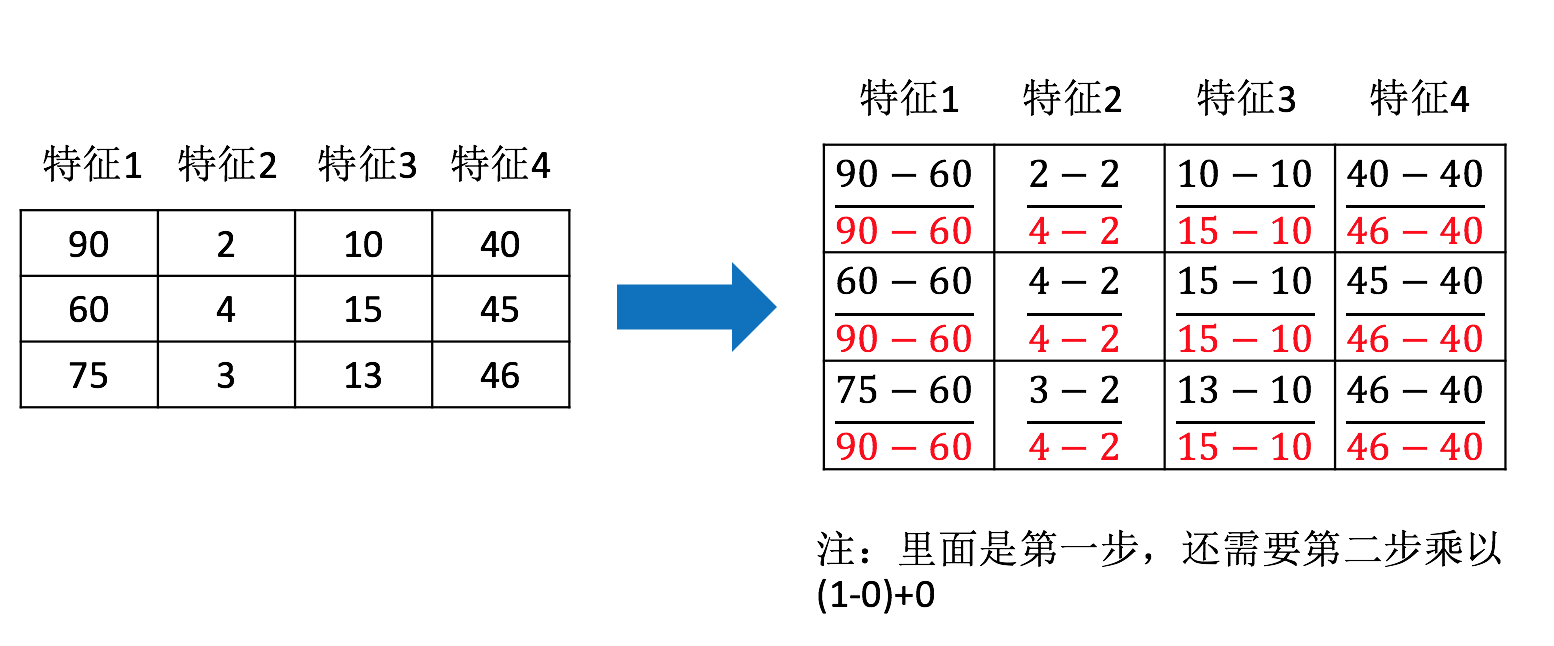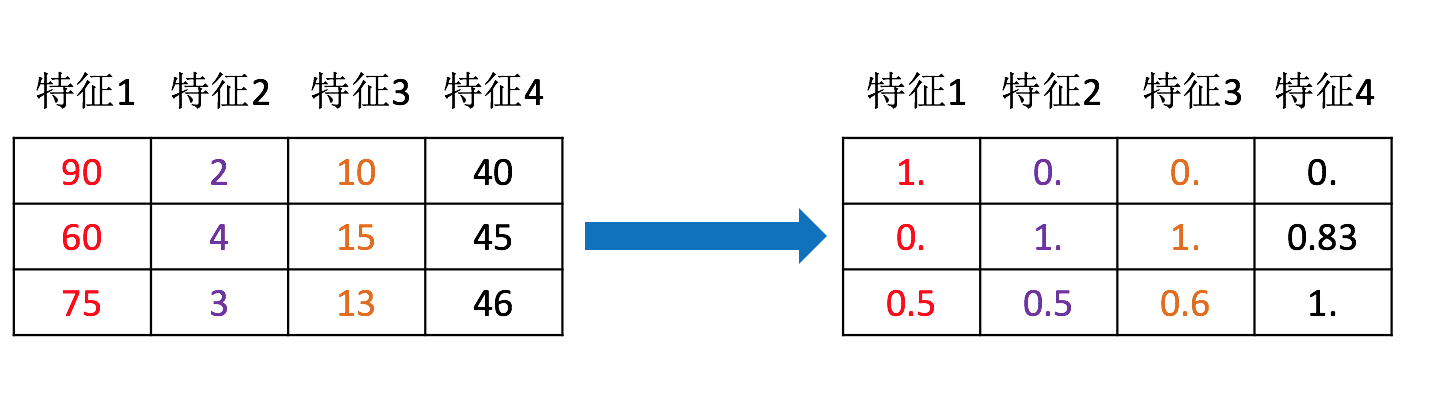
- 定义:
    - 对原始数据进行变换把数据映射到(默认为[0,1])之间
- api:
    - sklearn.preprocessing.MinMaxScaler (feature_range=(0,1)… )
        - 参数:feature_range -- 自己指定范围,默认0-1
- 总结:
    - 鲁棒性比较差(容易受到异常点的影响)
    - 只适合传统精确小数据场景(以后不会用你了)
## 标准化
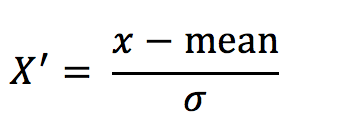
- 定义:
    - 对原始数据进行变换把数据变换到均值为0,标准差为1范围内
- api:
    - sklearn.preprocessing.StandardScaler( )
- 总结:
    - 异常值对我影响小
    - 适合现代嘈杂大数据场景(以后就是用你了)

# 交叉验证，网格搜索
- 交叉验证
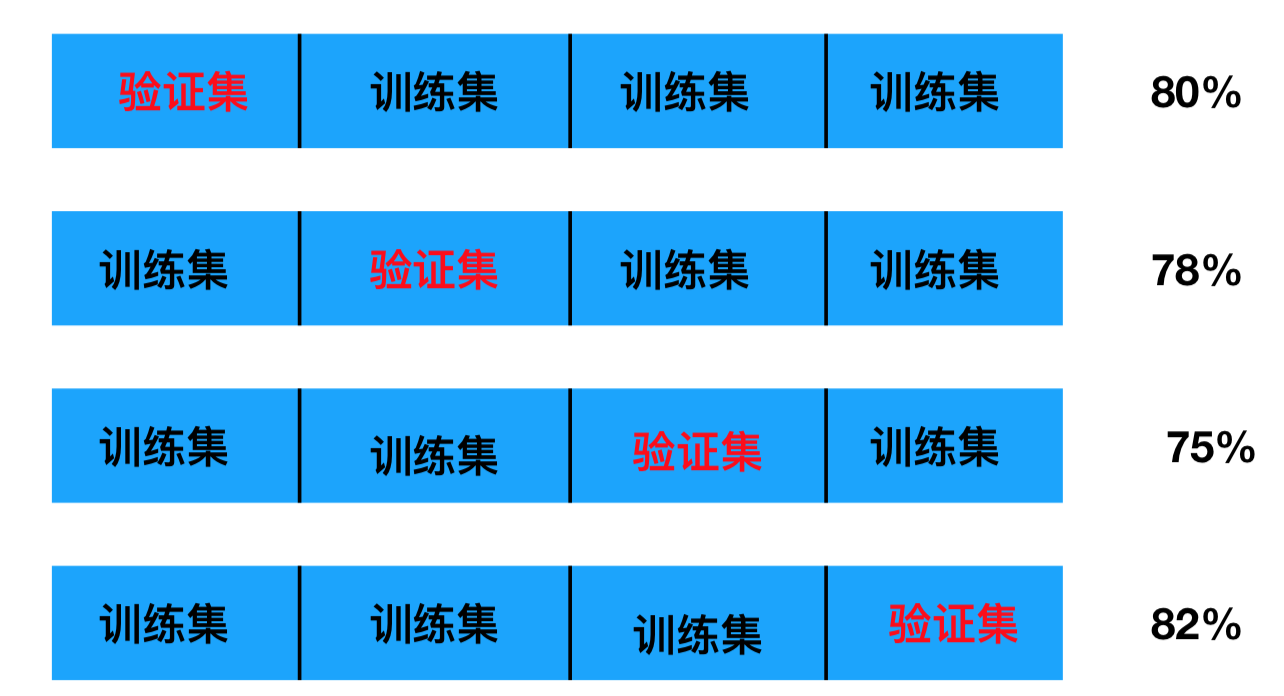
    - 定义：
        - 将拿到的训练数据，分为训练和验证集
        - \*折交叉验证
    - 分割方式：
        - 训练集：训练集+验证集
        - 测试集：测试集
    - 为什么需要交叉验证
        - 为了让被评估的模型更加准确可信
        - 注意：交叉验证不能提高模型的准确率
- 网格搜索
    - 超参数:
        - sklearn中,需要手动指定的参数,叫做超参数
    - 网格搜索就是把这些超参数的值,通过字典的形式传递进去,然后进行选择最优值
- api
    - sklearn.model_selection.GridSearchCV(estimator,param_grid=None,cv=None)
        - estimator -- 选择了哪个训练模型
        - param_grid -- 需要传递的超参数
        - cv -- 几折交叉验证

# k近邻算法优缺点
- 优点：
    - 简单有效
    - 重新训练的代价低
    - 适合类域交叉样本
        - KNN方法主要靠周围有限的邻近的样本,而不是靠判别类域的方法来确定所属类别的，因此对于类域的交叉或重叠较多的待分样本集来说，KNN方法较其他方法更为适合。
    - 适合样本容量比较大的类域自动分类
        - 该算法比较适用于样本容量比较大的类域的自动分类，而那些样本容量较小的类域采用这种算法比较容易产生误分。
- 缺点：
    - 惰性学习
        - KNN算法是懒散学习方法（lazy learning,基本上不学习），一些积极学习的算法要快很多
    - 类别评分不是规格化
        - 不像一些通过概率评分的分类
    - 输出可解释性不强
        - 例如决策树的输出可解释性就较强
    - 对不均衡的样本不擅长
        - 当样本不平衡时，如一个类的样本容量很大，而其他类样本容量很小时，有可能导致当输入一个新样本时，该样本的K个邻居中大容量类的样本占多数。该算法只计算“最近的”邻居样本，某一类的样本数量很大，那么或者这类样本并不接近目标样本，或者这类样本很靠近目标样本。无论怎样，数量并不能影响运行结果。可以采用权值的方法（和该样本距离小的邻居权值大）来改进。
    - 计算量较大
        - 目前常用的解决方法是事先对已知样本点进行剪辑，事先去除对分类作用不大的样本。

# 案例1——电影类型分析
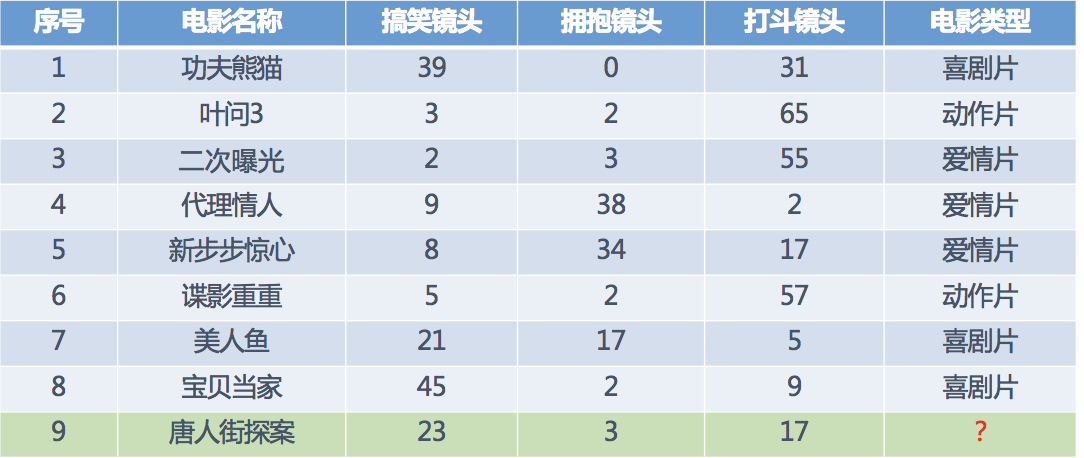

## 1.获取数据集

In [2]:
import numpy as np

x = np.array([[39, 0, 31], [3, 2, 65], [2, 3, 55], [9, 38, 2], [8, 34, 17], [5, 2, 57], [21, 17, 5], [45, 2, 9]])
y = np.array([0, 1, 2, 2, 2, 2, 1, 1])

### 1.1 数据可视化

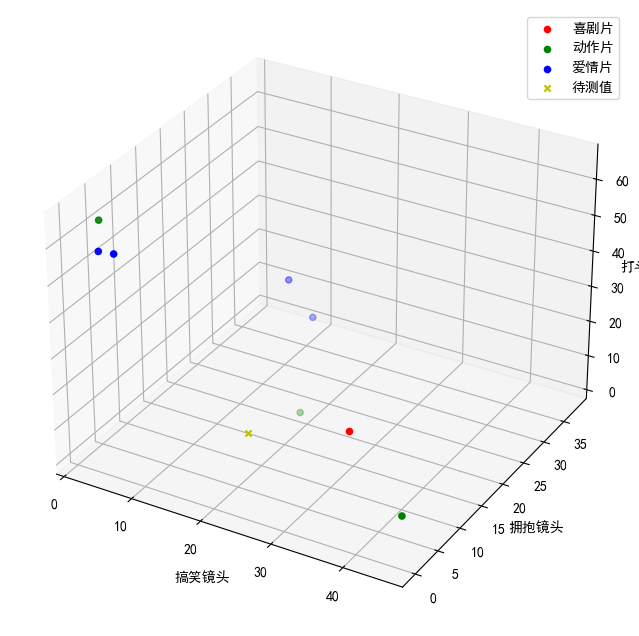

In [3]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (20, 8))
ax = fig.add_subplot(111, projection='3d')

colors = ['r', 'g', 'b']
labels = ['喜剧片', '动作片', '爱情片']

for i in range(3):
    ax.scatter(x[y == i][:, 0], x[y == i][:, 1], x[y == i][:, 2], c=colors[i], marker='o', label=labels[i])
ax.scatter(23,  3, 17, c='y', marker='x', label="待测值")

ax.set_xlabel('搞笑镜头')
ax.set_ylabel('拥抱镜头')
ax.set_zlabel('打斗镜头')

ax.legend()
plt.show()

## 2.数据基本处理

## 3.特征工程

## 4.机器学习
### 4.1实例化API

In [4]:
estimator = KNeighborsClassifier(n_neighbors=3)

### 4.2使用fit方法进行训练

In [5]:
estimator.fit(x, y)

KNeighborsClassifier(n_neighbors=3)

### 4.3预测

In [6]:
y_prdict = estimator.predict([[23,3,17]])
labels[y_prdict[0]]

'动作片'

## 5.模型评估

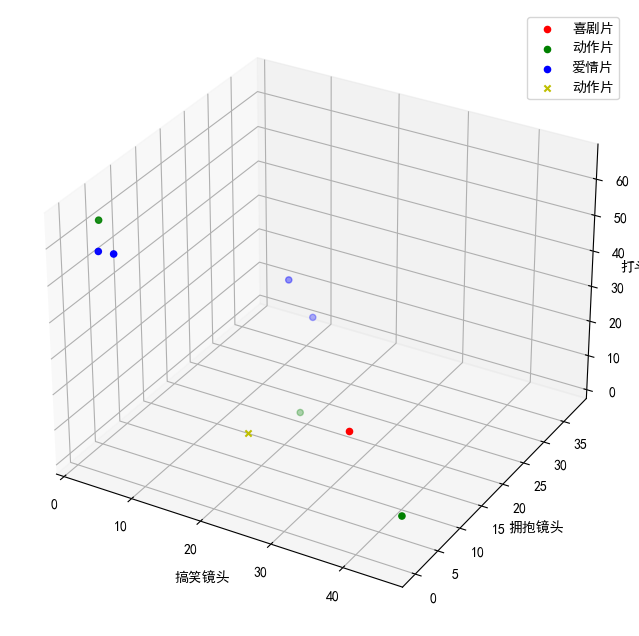

In [7]:
fig = plt.figure(figsize = (20, 8))
ax = fig.add_subplot(111, projection='3d')

colors = ['r', 'g', 'b']
labels = ['喜剧片', '动作片', '爱情片']

for i in range(3):
    ax.scatter(x[y == i][:, 0], x[y == i][:, 1], x[y == i][:, 2], c=colors[i], marker='o', label=labels[i])
ax.scatter(23,  3, 17, c='y', marker='x', label=labels[y_prdict[0]])

ax.set_xlabel('搞笑镜头')
ax.set_ylabel('拥抱镜头')
ax.set_zlabel('打斗镜头')

ax.legend()
plt.show()

# 案例2——鸢尾花种类预测
## 1.获取数据集

In [8]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd
import seaborn as sns

In [9]:
iris = load_iris()
# iris

In [10]:
data_p = pd.DataFrame(iris.data, columns=['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width'])
data_p["Species"] = iris.target
data_p

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### 可视化

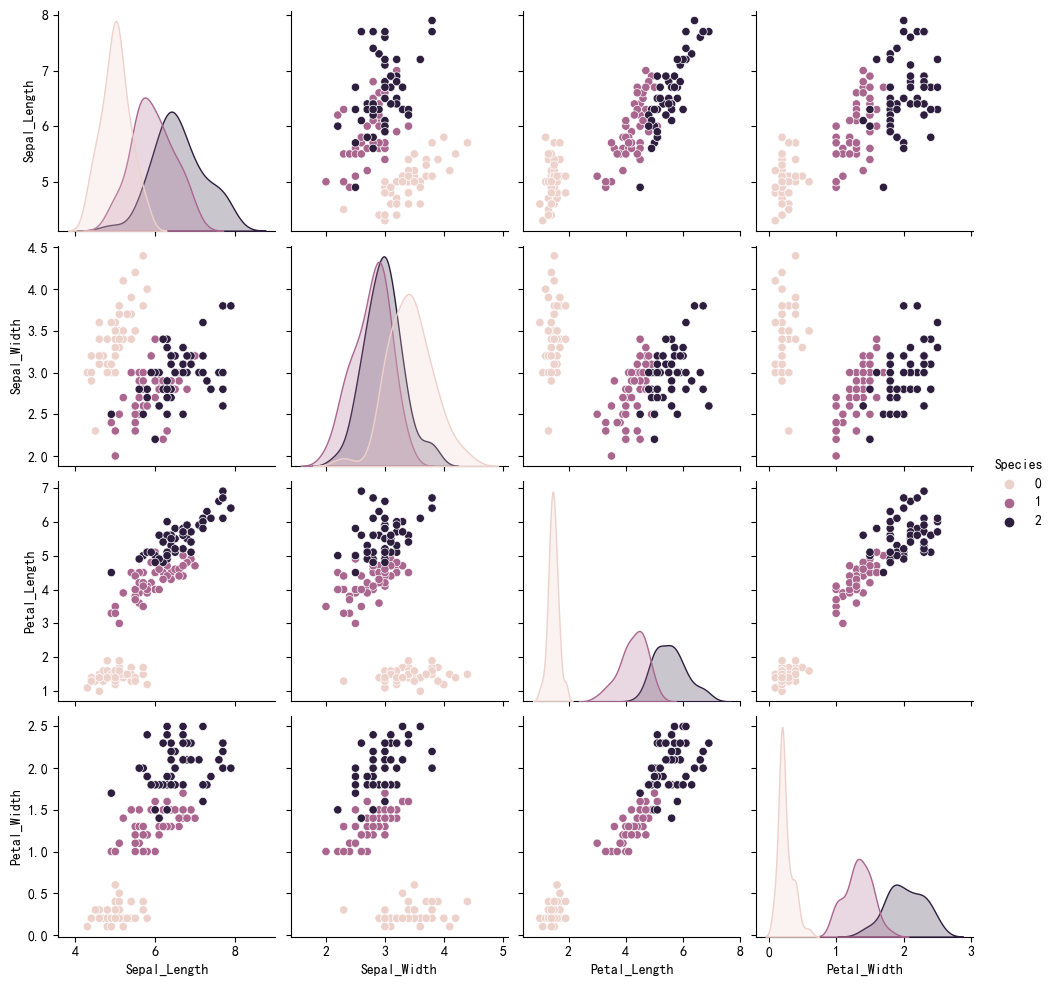

In [11]:
# fig, ax = plt.subplots(constrained_layout=True, figsize=(8, 8))
# sns.scatterplot(x='Sepal_Length', y='Sepal_Width', data=data_p, hue="Species", marker="o", label='Train Data')
# plt.xlabel('Sepal_Length')
# plt.ylabel('Sepal_Width')
# plt.title('鸢尾花种类分布图')
# plt.legend()
sns.pairplot(data_p, hue="Species")

plt.show()

## 2.数据基本处理

In [12]:
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target,test_size=0.2, random_state=22)

## 3.特征工程：标准化

In [13]:
transfer = StandardScaler()
x_train = transfer.fit_transform(x_train)
x_test = transfer.transform(x_test)

## 4、机器学习(模型训练)
###  4.1 实例化预估器类

In [14]:
estimator = KNeighborsClassifier()

### 4.2 模型选择与调优——网格搜索和交叉验证

In [15]:
param_dict = {"n_neighbors": [1, 3, 5,7, 9]}
estimator = GridSearchCV(estimator, param_grid=param_dict, cv=3)

### 4.3 fit数据进行训练

In [16]:
estimator.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9]})

## 5、模型评估

In [17]:
# 方法1：比对真实值和预测值
y_predict = estimator.predict(x_test)
print("预测结果为:\n", y_predict)
print("比对真实值和预测值：\n", y_predict == y_test)
print("-----------------------------------------------------------------------------")
# 方法2：直接计算准确率
score = estimator.score(x_test, y_test)
print("准确率为：\n", score)

预测结果为:
 [0 2 1 2 1 1 1 1 1 0 2 1 2 2 0 2 1 1 1 1 0 2 0 1 2 0 2 2 2 2]
比对真实值和预测值：
 [ True  True  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True]
-----------------------------------------------------------------------------
准确率为：
 0.9333333333333333


In [18]:
print("在交叉验证中验证的最好结果：\n", estimator.best_score_)
print("最好的参数模型：\n", estimator.best_estimator_)
print("每次交叉验证后的准确率结果：\n", estimator.cv_results_)

在交叉验证中验证的最好结果：
 0.975
最好的参数模型：
 KNeighborsClassifier()
每次交叉验证后的准确率结果：
 {'mean_fit_time': array([0.00166686, 0.00133308, 0.00100096, 0.00133363, 0.00133467]), 'std_fit_time': array([0.00047092, 0.00047199, 0.00081897, 0.00047075, 0.0004707 ]), 'mean_score_time': array([0.00566665, 0.0043331 , 0.00399892, 0.00733519, 0.00450381]), 'std_score_time': array([0.00094313, 0.00124749, 0.00081362, 0.00205682, 0.00040961]), 'param_n_neighbors': masked_array(data=[1, 3, 5, 7, 9],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'n_neighbors': 1}, {'n_neighbors': 3}, {'n_neighbors': 5}, {'n_neighbors': 7}, {'n_neighbors': 9}], 'split0_test_score': array([1.   , 0.975, 1.   , 1.   , 0.975]), 'split1_test_score': array([0.925, 0.975, 0.975, 0.95 , 0.95 ]), 'split2_test_score': array([0.95 , 0.9  , 0.95 , 0.925, 0.925]), 'mean_test_score': array([0.95833333, 0.95      , 0.975     , 0.95833333, 0.95      ]), 'std_test_score': array([0

每次交叉验证后的准确率结果是一个字典，包含了网格搜索中每个参数组合下的交叉验证结果。下面解释每个键的含义：

- `mean_fit_time`: 每个参数组合下模型拟合的平均时间。
- `std_fit_time`: 每个参数组合下模型拟合时间的标准差。
- `mean_score_time`: 每个参数组合下模型评分的平均时间。
- `std_score_time`: 每个参数组合下模型评分时间的标准差。
- `param_n_neighbors`: 每个参数组合的超参数值。
- `params`: 参数组合的列表。
- `split0_test_score`, `split1_test_score`, `split2_test_score`: 每个参数组合在每个交叉验证折叠中的测试集准确率。
- `mean_test_score`: 每个参数组合的平均测试集准确率。
- `std_test_score`: 每个参数组合的测试集准确率的标准差。
- `rank_test_score`: 每个参数组合的测试集准确率的排名，从1开始，值越小表示性能越好。

通过这些结果，可以比较不同参数组合的性能表现，并选择具有最佳准确率的参数模型。在给定示例中，参数`n_neighbors`的取值为1、3、5、7和9，每个参数组合下的测试集准确率、平均准确率和排名都给出了对模型性能的评估。

# 案例3——预测facebook签到位置
## 1.获取数据集

In [19]:
facebook = pd.read_csv("./data/train.csv")

In [20]:
facebook

,row_id,x,y,accuracy,time,place_id
0,0,0.7941,9.0809,54,470702,8523065625
1,1,5.9567,4.7968,13,186555,1757726713
2,2,8.3078,7.0407,74,322648,1137537235
3,3,7.3665,2.5165,65,704587,6567393236
4,4,4.0961,1.1307,31,472130,7440663949
...,...,...,...,...,...,...
29118016,29118016,6.5133,1.1435,67,399740,8671361106
29118017,29118017,5.9186,4.4134,67,125480,9077887898
29118018,29118018,2.9993,6.3680,67,737758,2838334300
29118019,29118019,4.0637,8.0061,70,764975,1007355847


## 2.基本数据处理
### 2.1 缩小数据范围

In [21]:
facebook_data = facebook.query("x>2.0 & x<2.5 & y>2.0 & y<2.5")

In [22]:
facebook_data

,row_id,x,y,accuracy,time,place_id
163,163,2.1663,2.3755,84,669737,3869813743
310,310,2.3695,2.2034,3,234719,2636621520
658,658,2.3236,2.1768,66,502343,7877745055
1368,1368,2.2613,2.3392,73,319822,9775192577
1627,1627,2.3331,2.0011,66,595084,6731326909
...,...,...,...,...,...,...
29116142,29116142,2.0804,2.0657,168,217886,1247398579
29116267,29116267,2.4309,2.4646,33,314360,1951613663
29116295,29116295,2.1797,2.1707,89,74954,4724115005
29116475,29116475,2.3924,2.2704,62,206257,2819110495


### 2.2 选择时间特征

In [23]:
time = pd.to_datetime(facebook_data["time"], unit="s")
time = pd.DatetimeIndex(time)
facebook_data["day"] = time.day
facebook_data["hour"] = time.hour
facebook_data["weekday"] = time.weekday

C:\Users\jie\AppData\Local\Temp\ipykernel_23352\779099077.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  facebook_data["day"] = time.day
C:\Users\jie\AppData\Local\Temp\ipykernel_23352\779099077.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  facebook_data["hour"] = time.hour
C:\Users\jie\AppData\Local\Temp\ipykernel_23352\779099077.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

### 2.3 去掉签到较少的地方

In [24]:
place_count = facebook_data.groupby("place_id").count()
place_count = place_count[place_count["row_id"]>3]
facebook_data = facebook_data[facebook_data["place_id"].isin(place_count.index)]

### 2.4 确定特征值和目标值

In [25]:
x = facebook_data[["x", "y", "accuracy", "day", "hour", "weekday"]]
y = facebook_data["place_id"]

### 2.5 分割数据集

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=22)

## 3.特征工程--特征预处理(标准化)
### 3.1 实例化一个转换器

In [27]:
transfer = StandardScaler()

### 3.2 调用fit_transform

In [28]:
x_train = transfer.fit_transform(x_train)
x_test = transfer.transform(x_test)

## 4.机器学习--knn+cv
### 4.1 实例化一个估计器

In [29]:
estimator = KNeighborsClassifier()

### 4.2 调用gridsearchCV

In [30]:
param_grid = {"n_neighbors": [1, 3, 5, 7, 9]}
estimator = GridSearchCV(estimator, param_grid=param_grid, cv=5)

### 4.3 模型训练

In [31]:
estimator.fit(x_train, y_train)

D:\DeepLearning\miniconda3\envs\pytorch\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9]})

## 5.模型评估
### 5.1 基本评估方式

In [32]:
score = estimator.score(x_test, y_test)
print("最后预测的准确率为:\n", score)

y_predict = estimator.predict(x_test)
print("最后的预测值为:\n", y_predict)
print("预测值和真实值的对比情况:\n", y_predict == y_test)

最后预测的准确率为:
 0.36515361515361516
最后的预测值为:
 [9983648790 6329243787 9674001925 ... 2990018952 4830766946 7065571836]
预测值和真实值的对比情况:
 24703810     True
19445902    False
18490063     True
7762709     False
6505956     False
            ...  
27632888    False
23367671    False
6692268      True
25834435    False
13319005    False
Name: place_id, Length: 17316, dtype: bool


### 5.2 使用交叉验证后的评估方式

In [33]:
print("在交叉验证中验证的最好结果:\n", estimator.best_score_)
print("最好的参数模型:\n", estimator.best_estimator_)
print("每次交叉验证后的验证集准确率结果和训练集准确率结果:\n",estimator.cv_results_)

在交叉验证中验证的最好结果:
 0.3546044971864908
最好的参数模型:
 KNeighborsClassifier(n_neighbors=1)
每次交叉验证后的验证集准确率结果和训练集准确率结果:
 {'mean_fit_time': array([0.05887308, 0.05441122, 0.05094233, 0.05193043, 0.05574083]), 'std_fit_time': array([0.01157047, 0.00153016, 0.0023519 , 0.00276873, 0.00496871]), 'mean_score_time': array([0.51043348, 0.52547908, 0.5498179 , 0.58995733, 0.63519015]), 'std_score_time': array([0.06068236, 0.0084115 , 0.00355953, 0.01524662, 0.02129614]), 'param_n_neighbors': masked_array(data=[1, 3, 5, 7, 9],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'n_neighbors': 1}, {'n_neighbors': 3}, {'n_neighbors': 5}, {'n_neighbors': 7}, {'n_neighbors': 9}], 'split0_test_score': array([0.35948027, 0.34311838, 0.35235804, 0.35303176, 0.34927815]), 'split1_test_score': array([0.35466795, 0.34369586, 0.35563041, 0.35370549, 0.34821944]), 'split2_test_score': array([0.35524543, 0.34119346, 0.3506256 , 0.35129933, 0.34860443]), '